[17.166666666666668, 22.033333333333335, 19.7, 22.6, 14.9, 22.033333333333335, 12.266666666666667, 17.355555555555554, 17.455555555555556, 15.71111111111111, 19.788888888888888, 20.544444444444444, 18.22222222222222, 16.655555555555555, 15.855555555555556, 16.177777777777777, 21.855555555555554, 19.7, 16.266666666666666, 18.8, 22.444444444444443, 16.755555555555556, 21.066666666666666, 19.066666666666666, 16.055555555555557, 12.8, 16.266666666666666, 18.68888888888889, 15.922222222222222, 12.122222222222222, 20.11111111111111, 22.066666666666666, 22.1, 22.066666666666666, 17.92222222222222, 16.866666666666667, 20.27777777777778, 19.11111111111111, 19.044444444444444, 22.1, 14.61111111111111, 23.177777777777777, 19.366666666666667, 22.444444444444443, 12.38888888888889, 21.855555555555554, 14.777777777777779, 19.788888888888888]
48
[19.677777777777777, 15.188888888888888, 19.011111111111113, 21.07777777777778, 15.71111111111111, 17.122222222222224, 19.7, 23.444444444444443, 18.588888888

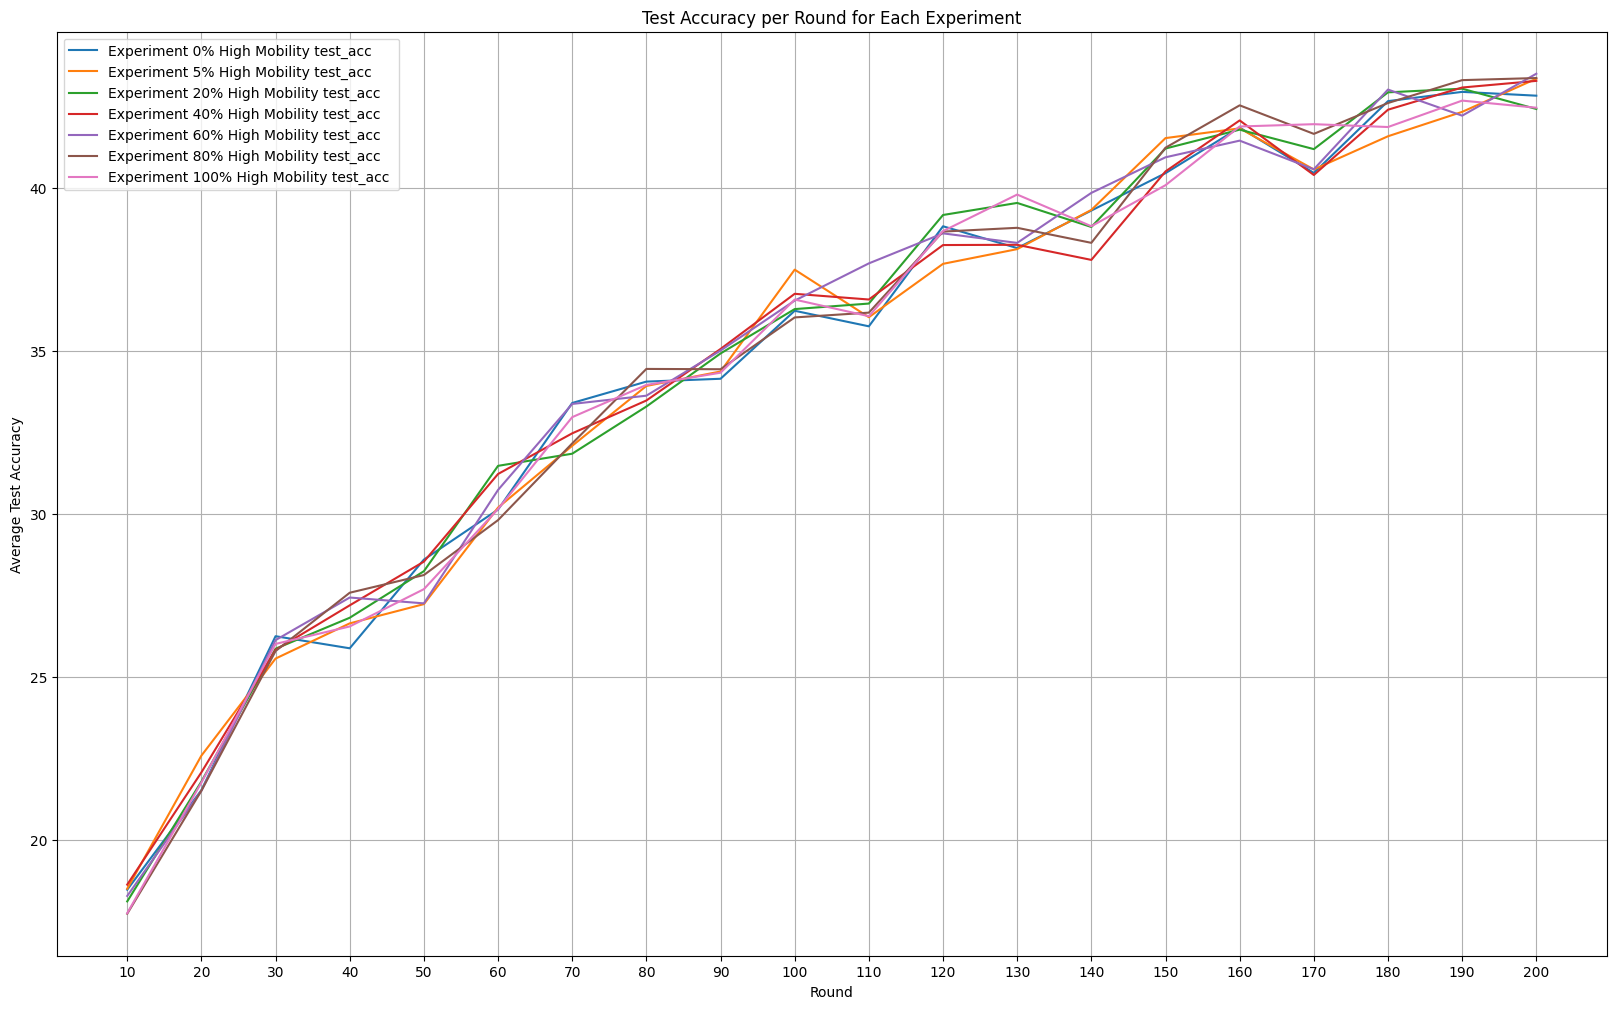

In [10]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt    
from collections import defaultdict


def average_of_first_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[:n])

def average_of_last_percent(lst, p):
    n = int(len(lst) * p)
    return np.mean(lst[-n:])

num_nodes = 48
# rounds_cutoff = float('inf')
rounds_cutoff = 200
experiments = {
    0.0: ".saved_experiments/45-complete/2024-05-30T18:45-dynamic_48_0_0.txt/machine0",
    0.05: ".saved_experiments/45-complete/2024-05-30T19:21-dynamic_48_0_05.txt/machine0",
    0.2: ".saved_experiments/45-complete/2024-05-30T19:57-dynamic_48_0_2.txt/machine0",
    0.4: ".saved_experiments/45-complete/2024-05-30T20:33-dynamic_48_0_4.txt/machine0",
    0.6: ".saved_experiments/45-complete/2024-05-30T03:29-dynamic_48_0_6.txt/machine0",
    0.8: ".saved_experiments/45-complete/2024-05-30T04:07-dynamic_48_0_8.txt/machine0",
    1.0: ".saved_experiments/45-complete/2024-05-30T21:10-dynamic_48_1_0.txt/machine0",
}
experiment_names = {
    0.0: "0% High Mobility",
    0.05: "5% High Mobility",
    0.2: "20% High Mobility",
    0.4: "40% High Mobility",
    0.6: "60% High Mobility",
    0.8: "80% High Mobility",
    1.0: "100% High Mobility",
}
data = {}

for experiment, dir in experiments.items():
    data[experiment] = {}
    for i in range(num_nodes):
        file_path = os.path.join(dir, f"{i}_results.json")
        if os.path.exists(file_path):
            with open(file_path, "r") as file:
                content = json.load(file)

                for statistic, rounds in content.items():
                    if statistic not in data[experiment]:
                        data[experiment][statistic] = {}

                    for round, value in rounds.items():
                        if int(round) > rounds_cutoff:
                            continue

                        if round not in data[experiment][statistic]:
                            data[experiment][statistic][round] = []
                        data[experiment][statistic][round].append(value)


statistics = ["test_acc"]
averages = {}
high_mobility_averages = defaultdict(lambda: defaultdict(dict))
low_mobility_averages = defaultdict(lambda: defaultdict(dict))
for experiment in data:
    averages[experiment] = {}
    for statistic in statistics:
        if statistic not in averages[experiment]:
            averages[experiment][statistic] = {}

        for round, values in data[experiment][statistic].items():
            averages[experiment][statistic][round] = np.mean(values)

            if round == "10":
                print(values)
                print(len(values))

            high_mobility_proportion = experiment
            low_mobility_proportion = 1 - experiment
            high_mobility_averages[experiment][statistic][round] = average_of_first_percent(values, high_mobility_proportion)
            low_mobility_averages[experiment][statistic][round] = average_of_last_percent(values, low_mobility_proportion)

plt.figure(figsize=(20, 12))
def plot_averages(experiment_names, averages, extra_info=""):
    for experiment, statistics_dict in averages.items():
        for statistic in statistics:
            rounds, acc_values = zip(*averages[experiment][statistic].items())
            plt.plot(rounds, acc_values, label=f"Experiment {experiment_names[experiment]} {statistic} {extra_info}")

plot_averages(experiment_names, averages)

plt.xlabel("Round")
plt.ylabel("Average Test Accuracy")
plt.title("Test Accuracy per Round for Each Experiment")
plt.legend()
plt.grid(True)
plt.show()


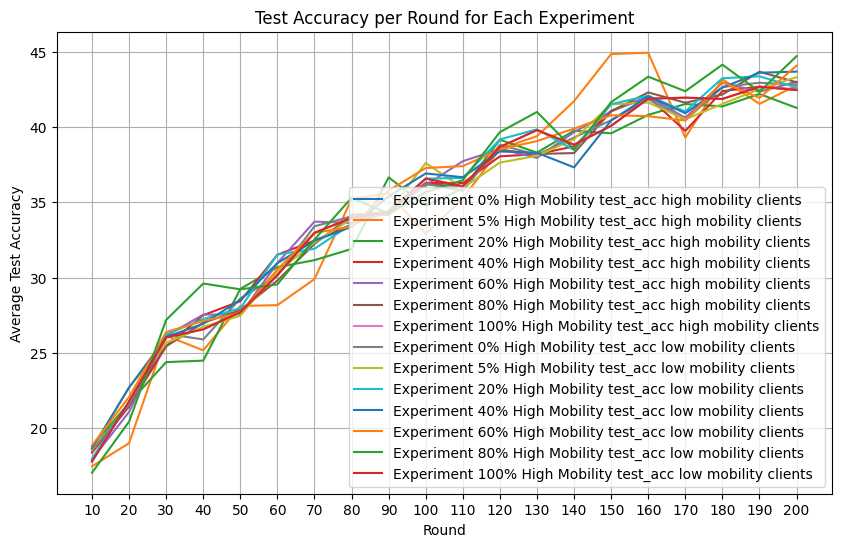

In [11]:
plt.figure(figsize=(10, 6))

plot_averages(experiment_names, high_mobility_averages, 'high mobility clients')
plot_averages(experiment_names, low_mobility_averages, 'low mobility clients')

plt.xlabel("Round")
plt.ylabel("Average Test Accuracy")
plt.title("Test Accuracy per Round for Each Experiment")
plt.legend()
plt.grid(True)
plt.show()
